<pre><h3>
Name     - Sunny Goswami
Section  - DS
Roll No. - 40
University Roll No. - 2013664


<u>Problem Statement</u>:To create a Movie Recommendation System.</pre></h3>

# Data Collection

<b>In this Project, I have collected data from various sources, in total there are notebook files, each of them is used for collecting movie of different years.
    
Notebook File 1.  DataCollection-2016    : Movies Data collected contains Movies till year 2016.<br>
Notebook File 2.  DataCollection-2017    : Movies Data Collected of year 2017.<br>
Notebook File 3.  DataCollection-2018-20 : Movies Data Collected from year 2018 till 2020.</b>

## DataCollection-2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# IMDB 5000 Movie Dataset
data_df = pd.read_csv('movie_metadata.csv') 

In [3]:
data_df.head(4)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000


In [4]:
data_df.shape

(5043, 28)

In [5]:
data_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

<h2>List of movies from year 1916 till 2016<h2>

Text(0, 0.5, 'Year')

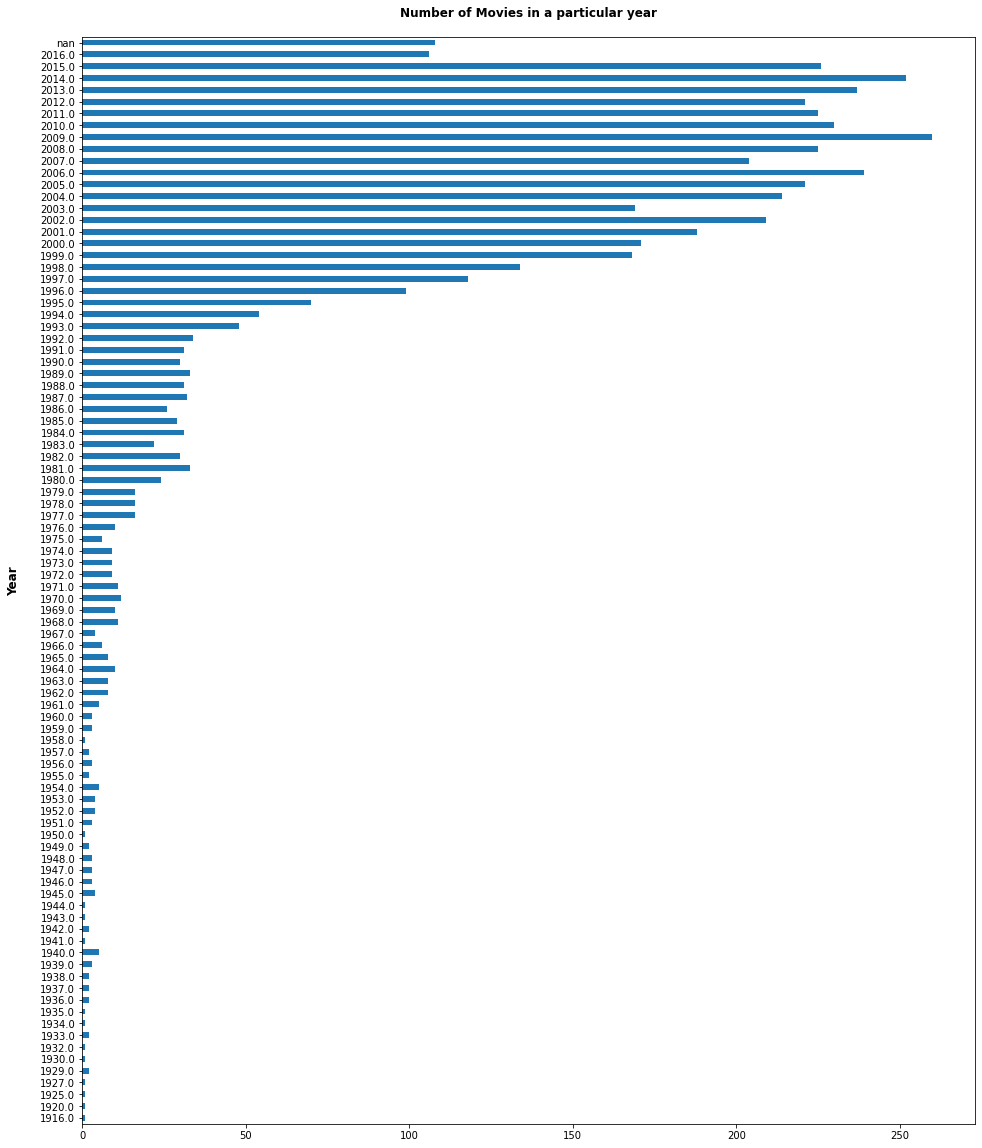

In [6]:
ax = data_df.title_year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(16,20))
# Set x-axis label
ax.set_xlabel("Number of Movies in a particular year", labelpad=20, weight='bold', size=12) 
ax.xaxis.set_label_position('top') 
# Set y-axis label
ax.set_ylabel("Year", labelpad=20, weight='bold', size=12)

In [7]:
data_df.movie_title[0]

'Avatar\xa0'

In [8]:
data_df.loc[data_df.movie_title=='Avatar\xa0',['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','genres','imdb_score','num_user_for_reviews']]

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,imdb_score,num_user_for_reviews
0,Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,7.9,3054.0


In [9]:
# Will be using these features for recommendation
data_df = data_df.loc[:,['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','genres','imdb_score','num_user_for_reviews']]

In [10]:
data_df.head(3)

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,imdb_score,num_user_for_reviews
0,Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,7.9,3054.0
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,7.1,1238.0
2,Spectre,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,6.8,994.0


In [11]:
# Number of Null values in each column
data_df.isnull().sum()

movie_title               0
director_name           104
actor_1_name              7
actor_2_name             13
actor_3_name             23
genres                    0
imdb_score                0
num_user_for_reviews     21
dtype: int64

In [12]:
# Replacing Null Values with 'unknown' in columns: actor_1_name, actor_2_name, actor_3_name, director_name
data_df['actor_1_name'].fillna('unknown', inplace=True)
data_df['actor_2_name'].fillna('unknown', inplace=True)
data_df['actor_3_name'].fillna('unknown', inplace=True)
data_df['director_name'].fillna('unknown', inplace=True)

In [13]:
# Dropping all other rows containing null values
data_df.dropna(inplace=True, axis=0)

In [14]:
data_df.isnull().sum()

movie_title             0
director_name           0
actor_1_name            0
actor_2_name            0
actor_3_name            0
genres                  0
imdb_score              0
num_user_for_reviews    0
dtype: int64

In [15]:
data_df.head(3)

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,imdb_score,num_user_for_reviews
0,Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,7.9,3054.0
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,7.1,1238.0
2,Spectre,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,6.8,994.0


<pre>Strip Spaces and Convert to Lowercase from features actor_1_name, actor_2_name, actor_3_name and director_name. 
This way, our engine will not confuse between Johnny Depp and Johnny Galecki. Also Replacing | character in feature genres with spaces
</pre>

In [16]:
data_df['genres'] = data_df['genres'].str.replace('|', ' ')
data_df['actor_1_name'] = data_df['actor_1_name'].str.replace(' ','')
data_df['actor_2_name'] = data_df['actor_2_name'].str.replace(' ','')
data_df['actor_3_name'] = data_df['actor_3_name'].str.replace(' ','')
data_df['director_name'].fillna('unknown', inplace=True)
data_df['director_name'] = data_df['director_name'].str.replace(' ','')
data_df = data_df.rename(columns={'imdb_score': 'vote_average', 'num_user_for_reviews':'vote_count'})

In [17]:
data_df.head(3)

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,vote_average,vote_count
0,Avatar,JamesCameron,CCHPounder,JoelDavidMoore,WesStudi,Action Adventure Fantasy Sci-Fi,7.9,3054.0
1,Pirates of the Caribbean: At World's End,GoreVerbinski,JohnnyDepp,OrlandoBloom,JackDavenport,Action Adventure Fantasy,7.1,1238.0
2,Spectre,SamMendes,ChristophWaltz,RoryKinnear,StephanieSigman,Action Adventure Thriller,6.8,994.0


In [18]:
data_df['movie_title'] = data_df['movie_title'].str.lower()
data_df['actor_1_name'] = data_df['actor_1_name'].str.lower()
data_df['actor_2_name'] = data_df['actor_2_name'].str.lower()
data_df['actor_3_name'] = data_df['actor_3_name'].str.lower()
data_df['director_name'] = data_df['director_name'].str.lower()

In [19]:
# Feature 'movie_title' comes with an extra character representing new line. We need to remove this.
data_df['movie_title'][0]

'avatar\xa0'

In [20]:
data_df['movie_title'] = data_df['movie_title'].str.rstrip('\xa0')

In [21]:
data_df['movie_title'][5]

'john carter'

In [22]:
# This feature will be used later during modelling
data_df['comb'] = data_df['actor_1_name'] + ' ' + data_df['actor_2_name'] + ' ' + data_df['actor_3_name'] + ' ' + data_df['director_name'] + ' ' + data_df['genres']

In [23]:
data_df.head(1)

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,vote_average,vote_count,comb
0,avatar,jamescameron,cchpounder,joeldavidmoore,wesstudi,Action Adventure Fantasy Sci-Fi,7.9,3054.0,cchpounder joeldavidmoore wesstudi jamescamero...


In [24]:
data_df.to_csv('Data-till2016.csv', index=False)